# Telecom Churn Case Study

####  Importing the required libraries for EDA


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)

#Visualisation
import seaborn as sns             
import matplotlib.pyplot as plt
%matplotlib inline


#Modelling
import sklearn.preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Loading the data into dataframe

In [2]:
# Read the telecom data file and explore the data
telecom_df = pd.read_csv("telecom_churn_data.csv")
# Display the top 5 rows 
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [3]:
# Display the last 5 rows 
telecom_df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2,2,60,110,0,50,60,110,0,50,6/3/2014,7/20/2014,8/26/2014,9/25/2014,60,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,79.081,140.835,29.26,18

### Data Understanding and Cleaning

In [4]:
# Get total rows and columns
telecom_df.shape

(99999, 226)

In [5]:
# Understand the columns and data
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# summing up the missing values (column-wise)
telecom_df.isnull().sum().sort_values(ascending=False)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
                            ...  
last_day_rch_amt_6              0
last_day_rch_amt_7              0
last_day_rch_amt_8              0
last_day_rch_amt_9              0
mobile_number                   0
Length: 226, dtype: int64

In [7]:
# Get percentage of null values present in the columns
round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64

In [8]:
# Get an overall idea on the numeric variables
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

In [9]:
# Will replace the recharge columns with zero
base_fields = [
    'total_rech_data','av_rech_amt_data', 'max_rech_data',
    'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g'
]
for field in base_fields:
    for month in ["_6", "_7", "_8", "_9"]:
        feature = field + month
        telecom_df[feature].fillna(0, inplace=True)

In [10]:
# Will replace the category columns with a new category as -1
base_fields = [ "night_pck_user", "fb_user"]
for field in base_fields:
    for month in ["_6", "_7", "_8", "_9"]:
        feature = field + month
        telecom_df[feature].fillna(-1, inplace=True)

In [11]:
# Get percentage of null values present in the columns after imputing the month data
round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2).sort_values(ascending=False).head(50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
std_ic_t2f_mou_9             7.75
loc_og_mou_9                 7.75
std_ic_t2o_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_9             7.75
std_og_mou_9                 7.75
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
spl_ic_mou_9                 7.75
std_og_t2t_mou_9             7.75
isd_ic_mou_9                 7.75
roam_ic_mou_9                7.75
std_og_t2m_mou_9             7.75
ic_others_9                  7.75
std_og_t2f_mou_9             7.75
spl_og_mou_9                 7.75
std_og_t2c_mou_9             7.75
isd_og_mou_9                 7.75
roam_og_mou_9                7.75
std_ic_mou_9                 7.75
std_ic_t2t_mou_9             7.75
loc_ic_mou_9                 7.75
loc_ic_t2m_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_ic_t2m_mou

In [12]:
# Removing columns having greater than 70%
missing_col_values = round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2)
cols_drop = missing_col_values.loc[missing_col_values > 70]
telecom_df.drop(cols_drop.index, axis=1, inplace=True)

In [13]:
# Imputing columns having greater than 5% null values, as all the columns have having equal null data
missing_col_values = round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2)
cols = missing_col_values.loc[missing_col_values > 5]

for col in cols.index:
    telecom_df[col].fillna(0, inplace=True)

In [14]:
# Get percentage of null values present in the columns after imputing the month data
round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2).sort_values(ascending=False)

date_of_last_rech_9    4.76
ic_others_6            3.94
std_ic_t2t_mou_6       3.94
spl_og_mou_6           3.94
loc_og_t2t_mou_6       3.94
                       ... 
max_rech_amt_8         0.00
max_rech_amt_7         0.00
max_rech_amt_6         0.00
total_rech_amt_9       0.00
mobile_number          0.00
Length: 222, dtype: float64

In [15]:
# Removing those missing rows having all the column values as NA
missing_col_values = round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2)
cols = missing_col_values.loc[missing_col_values > 2]

telecom_df = telecom_df[~telecom_df[cols.index].isnull().all(axis=1)]
telecom_df.shape

(99617, 222)

In [16]:
# Impute those missing columns with zero
missing_col_values = missing_col_values.drop(
    ['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
     'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
)

for col in missing_col_values.index:
    telecom_df[col].fillna(0, inplace=True)

In [17]:
# Get percentage of null values present in the columns after imputing the month data
round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2).sort_values(ascending=False).head(15)

date_of_last_rech_9     4.39
date_of_last_rech_8     3.25
date_of_last_rech_6     1.49
date_of_last_rech_7     1.47
last_date_of_month_9    1.30
last_date_of_month_8    0.75
last_date_of_month_7    0.32
og_others_6             0.00
spl_og_mou_9            0.00
spl_og_mou_8            0.00
spl_og_mou_7            0.00
std_og_mou_9            0.00
spl_og_mou_6            0.00
isd_og_mou_9            0.00
isd_og_mou_8            0.00
dtype: float64

In [18]:
# Impute the columns with the mode value in teh date columns
cols = [
    'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'
]
for col in cols:
    telecom_df[col].fillna(telecom_df[col].mode()[0], inplace=True)

In [19]:
# Get percentage of null values present in the columns after imputing the month data
round(100 *(telecom_df.isnull().sum() / len(telecom_df)), 2).sort_values(ascending=False).head(15)

sep_vbc_3g        0.0
isd_og_mou_6      0.0
og_others_9       0.0
og_others_8       0.0
og_others_7       0.0
og_others_6       0.0
spl_og_mou_9      0.0
spl_og_mou_8      0.0
spl_og_mou_7      0.0
spl_og_mou_6      0.0
isd_og_mou_9      0.0
isd_og_mou_8      0.0
isd_og_mou_7      0.0
std_og_mou_9      0.0
total_og_mou_7    0.0
dtype: float64

In [20]:
# Checking columns having all values as zero
columns = telecom_df.columns[(telecom_df == 0).all()]
columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [21]:
# remove these columns as well
telecom_df.drop(columns, axis=1, inplace=True)
telecom_df.shape

(99617, 211)

In [22]:
# Converting date fields to datetime objects
date_columns = list(telecom_df.filter(regex='date').columns)
for col in date_columns:
    telecom_df[col] = pd.to_datetime(telecom_df[col], format='%m/%d/%Y')

In [23]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
telecom_df.rename(
    columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7',
             'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'},
    inplace=True
)

### Filter high value customers

In [24]:
# calculate the total data recharge amount; number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df['total_data_rech_7'] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7

In [25]:
# calculate total recharge amount; call recharge amount + data recharge amount
telecom_df['amt_data_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['amt_data_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

In [26]:
# Calculate the recharge amount in the good phase to filter out the high value customers
telecom_df["rech_amt_good_phase_avg"] = (telecom_df["amt_data_6"] + telecom_df["amt_data_7"]) / 2
telecom_churn_df = telecom_df[telecom_df["rech_amt_good_phase_avg"] > telecom_df["rech_amt_good_phase_avg"].quantile(0.70)]

In [27]:
telecom_churn_df.shape

(29882, 216)

In [28]:
# delete variables created to filter high-value customers
telecom_churn_df = telecom_churn_df.drop(
    ['total_data_rech_6', 'total_data_rech_7','amt_data_6',
     'amt_data_7', 'rech_amt_good_phase_avg'],
    axis=1
)
telecom_churn_df.shape

(29882, 211)

We are having about 29.8k rows after selecting the customers who have provided recharge value more or equal to the recharge value of 70th percentile customers in the good phase.

In [29]:
# Function to derive the churn variable based of the usage of customer in the month 9
def get_churn_value(df, churn_month=9):
    features = ["vol_2g_mb_", "vol_3g_mb_", "total_ic_mou_", "total_og_mou_"]
    result = ~df[[attr_feature + str(churn_month) for attr_feature in features ]].any(axis=1)
    result = result.map({True:1, False:0})
    return result

In [30]:
# Derive churn
telecom_churn_df["churn"] = get_churn_value(telecom_churn_df)

In [31]:
telecom_churn_df.churn = telecom_churn_df.churn.astype("category")

# churn ratio
print(telecom_churn_df.churn.value_counts()*100 / telecom_churn_df.shape[0])

0    91.918212
1     8.081788
Name: churn, dtype: float64


In [32]:
# Remove all the KPI's in the month 9 after deriving the churn category.
month_9_col = [col for col in telecom_churn_df.columns if '_9' in col]
telecom_churn_df = telecom_churn_df.drop(month_9_col, axis=1)
telecom_churn_df.shape

(29882, 160)

In [33]:
telecom_churn_df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
7,7000701601,109,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
8,70015

***Observation:***
- There are about 8.08 % churn customer cases in the dataset

***

### EDA and Data Visualisation

#### ***circle_id***


In [34]:
telecom_churn_df.circle_id.value_counts()

109    29882
Name: circle_id, dtype: int64

In [35]:
telecom_churn_df.drop("circle_id", axis=1, inplace=True)

**Observation**
- We can remove the circle_id as it contains a single value

#### ***aon***

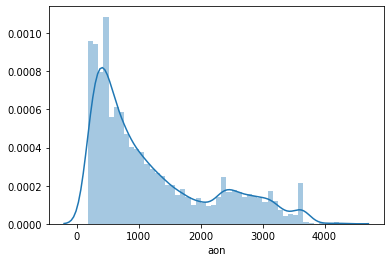

In [36]:
# Get the distribution of `aon` across the network
sns.distplot(telecom_churn_df.aon)
plt.show()

In [37]:
telecom_churn_df.aon.describe()

count    29882.000000
mean      1209.099424
std        957.310914
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

In [38]:
# Create various bin for aon to get a better understanding
telecom_churn_df['aon_bin'] = pd.cut(
    telecom_churn_df['aon'],
    range(0, telecom_churn_df['aon'].max(), 365),
    labels=range(0, int(round(telecom_churn_df['aon'].max()/365))-1 )
)
telecom_churn_df[["aon", "aon_bin"]]

,aon,aon_bin
0,968,2
7,802,2
8,315,0
21,720,1
23,604,1
...,...,...
99981,473,1
99984,820,2
99986,2696,7
99988,328,0


#### Incoming VS month VS AON

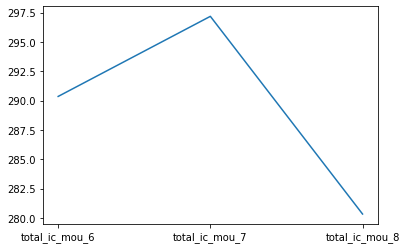

In [39]:
# Average monthly incoming MOU across month
incoming_col = telecom_churn_df.filter(regex ='total_ic_mou').columns
plt.plot(telecom_churn_df[incoming_col].mean())
plt.show()

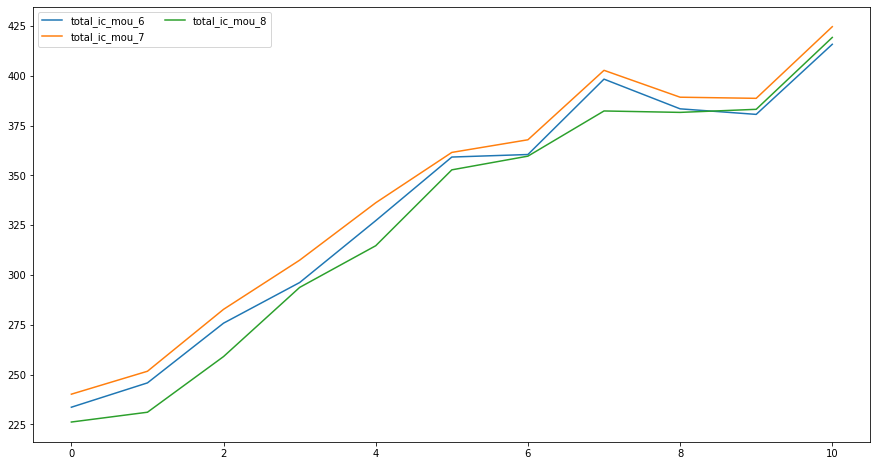

In [40]:
# Plot for average monthly incoming MOU across aon
incoming_col = telecom_churn_df.filter(regex='total_ic_mou').columns
total_call_mou = pd.DataFrame(telecom_churn_df.groupby('aon_bin', as_index=False)[incoming_col].mean())
total_call_mou['aon_bin'] = pd.to_numeric(total_call_mou['aon_bin'])

fig, ax = plt.subplots(figsize=(15, 8))
for column in total_call_mou.drop('aon_bin', axis=1):
    ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], label=column)

plt.legend(loc=2, ncol=2)
plt.show()

**Observation**
- Total Incoming MOU average for July are more compared to June for customers in all bands of AON
- Total Incoming MOU average for September is less compared to the June
- Total Incoming MOU average for August tends to show a decline compared to July.


#### Outgoing VS month VS AON


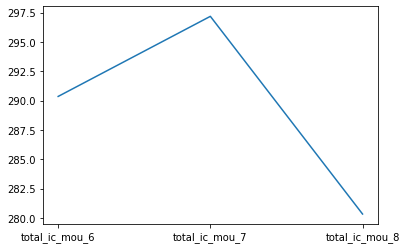

In [41]:
# Average monthly outgoing MOU across month
outgoing_col = telecom_churn_df.filter(regex ='total_og_mou').columns
plt.plot(telecom_churn_df[incoming_col].mean())
plt.show()

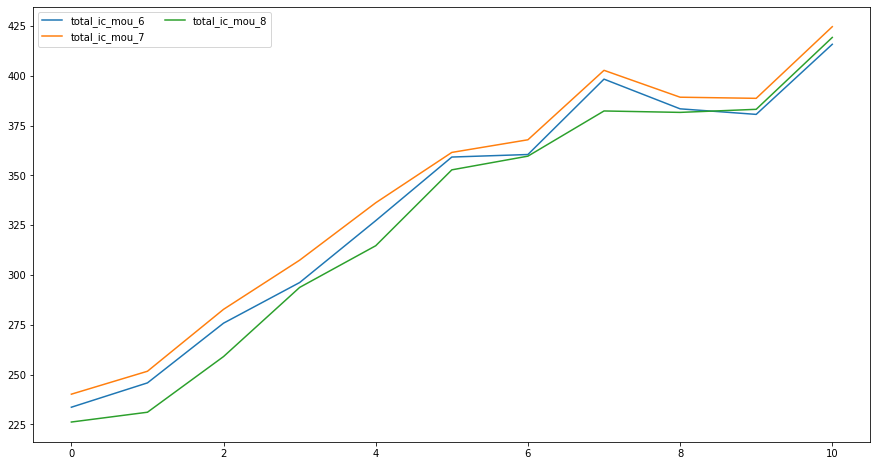

In [42]:
# Plot for average monthly incoming MOU across aon
outgoing_col = telecom_churn_df.filter(regex='total_og_mou').columns
total_call_mou = pd.DataFrame(telecom_churn_df.groupby('aon_bin', as_index=False)[incoming_col].mean())
total_call_mou['aon_bin'] = pd.to_numeric(total_call_mou['aon_bin'])

fig, ax = plt.subplots(figsize=(15,8))
for column in total_call_mou.drop('aon_bin', axis=1):
    ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], label=column)

plt.legend(loc=2, ncol=2)
plt.show()

**Observation**
- Total outgoing MOU average for September has got the lowest value.
- Total outgoing MOU average for August tends to decline compared to July.
- Total Outgoing MOU average for July are more compared to June for customers in most of the AON bands.

#### Incoming  MOU VS Churn


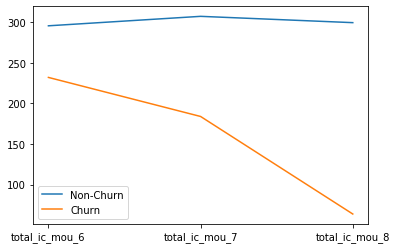

In [43]:
# Plot for average incoming MOU against churn
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
data = telecom_churn_df.groupby(['churn'])[ic_col].mean().T
plt.plot(data)
plt.legend(labels=['Non-Churn', 'Churn'])
plt.show()

**Observation**
- Average incoming MOU for churners drops after the month 7

#### Outgoing MOU VS Churn


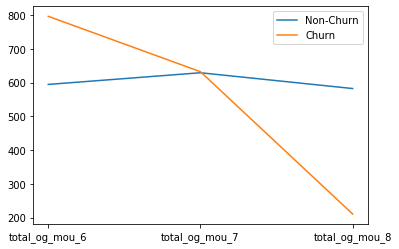

In [44]:
# Plot for average outgoing MOV against churn
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
data = telecom_churn_df.groupby(['churn'])[og_col].mean().T
plt.plot(data)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

**Observation**
- Average outgoing MOU for churners drops after the month 7

#### Avgerage incoming MOU per month (Churn vs Non-churn)


       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          295.498939      307.151259      299.380931
1          231.959677      183.884716       63.820021


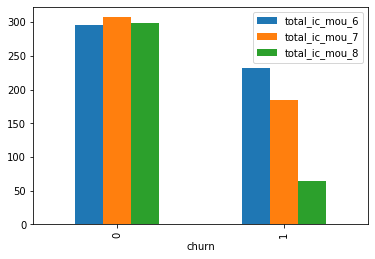

In [45]:
# Average incoming MOU data per month for churners and non-churners
data = telecom_churn_df.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()
print(data)
data.plot.bar()
plt.show()

#### Avgerage outgoing MOU per month (Churn vs Non-churn)

       total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          594.577043      629.146150      582.383149
1          796.276079      632.212571      210.677942


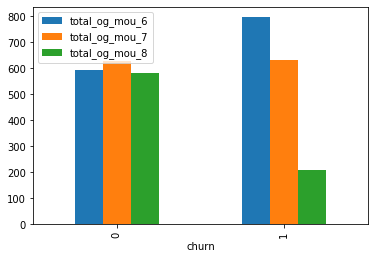

In [46]:
# Average outgoing MOU data per month for churners and non-churners
data = telecom_churn_df.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()
print(data)
data.plot.bar()
plt.show()

#### Outgoing to Incoming MOU for Churn v/s Non-churn

In [47]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
for i in range(6, 9):
    telecom_churn_df['og_to_ic_mou_'+str(i)] = (telecom_churn_df['total_og_mou_'+str(i)]) / (telecom_churn_df['total_ic_mou_' + str(i)] + 1)

churn                  0         1
og_to_ic_mou_6  6.235222  8.588170
og_to_ic_mou_7  6.068383  7.873116
og_to_ic_mou_8  5.675856  3.871838


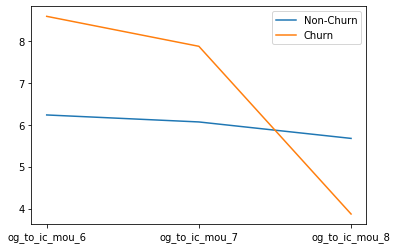

In [48]:
# Plot for outgoing to incoming mou
col = ['og_to_ic_mou_6','og_to_ic_mou_7','og_to_ic_mou_8']
data = telecom_churn_df.groupby(['churn'])[col].mean().T
print(data)
plt.plot(data)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

**Observation**
- Outgoing to Incoming MOU drops very drastically after month 7 for churners

#### Total data volume VS Churn

In [49]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8'
for i in range(6, 9):
    telecom_churn_df['vol_data_mb_'+str(i)] = (telecom_churn_df['vol_2g_mb_'+str(i)]+telecom_churn_df['vol_3g_mb_'+str(i)]).astype(int)

       vol_data_mb_6  vol_data_mb_7  vol_data_mb_8
churn                                             
0         478.309062     512.467943     488.698292
1         395.341615     311.702277     111.499793


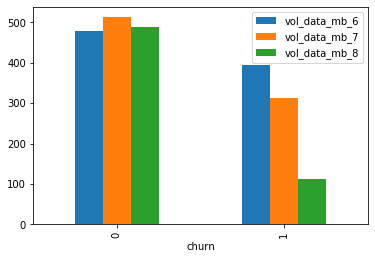

In [50]:
# Plot for total vol_data_mb for churn v/s non-churn
data = telecom_churn_df.groupby(['churn'])['vol_data_mb_6','vol_data_mb_7','vol_data_mb_8'].mean()
print(data)
data.plot.bar()
plt.show()

#### Total monthly rech VS Churn


In [51]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8
for i in range(6,9):
    telecom_churn_df['total_rech_num_data_'+str(i)] = (telecom_churn_df['count_rech_2g_'+str(i)]+telecom_churn_df['count_rech_3g_'+str(i)]).astype(int)
    telecom_churn_df['total_rech_amt_data_'+str(i)] = telecom_churn_df['total_rech_num_data_'+str(i)]*telecom_churn_df['av_rech_amt_data_'+str(i)]
    telecom_churn_df['total_month_rech_'+str(i)] = telecom_churn_df['total_rech_amt_'+str(i)]+telecom_churn_df['total_rech_amt_data_'+str(i)]

churn                         0            1
total_month_rech_6  1111.968911  1195.736099
total_month_rech_7  1210.875855   972.314315
total_month_rech_8  1112.221539   339.433358


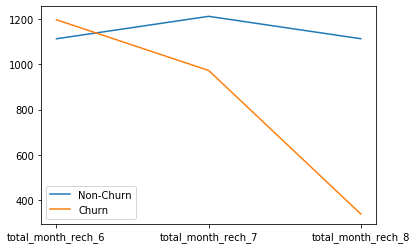

In [52]:
# Plot for total vol_data_mb for churn v/s non-churn
col = ['total_month_rech_6','total_month_rech_7','total_month_rech_8']
data = telecom_churn_df.groupby(['churn'])[col].mean().T
print(data)
plt.plot(data)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

**Observation**
- Total montly recharge also drops drastically after month 7 for churners

#### arpu for churn v/s non-churn


churn            0           1
arpu_6  550.044995  661.220858
arpu_7  563.336020  543.983878
arpu_8  533.141898  238.683613


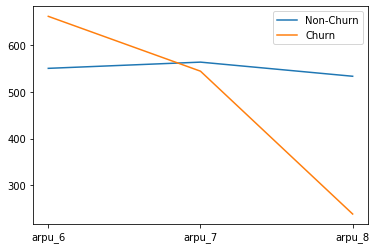

In [53]:
# Plot for arpy again churm
col = ['arpu_6','arpu_7','arpu_8']
data = telecom_churn_df.groupby(['churn'])[col].mean().T
print(data)
plt.plot(data)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

**Observation**
- Average revenue per user also drops after month 7 for churners

#### loc_og_mou vs churn

In [54]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    telecom_churn_df['Total_loc_mou_'+str(i)] = (telecom_churn_df['loc_og_mou_'+str(i)])+(telecom_churn_df['loc_ic_mou_'+str(i)])

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
churn                                          
0        261.351744    265.957381    252.511185
1        176.999731    137.329594     49.787325


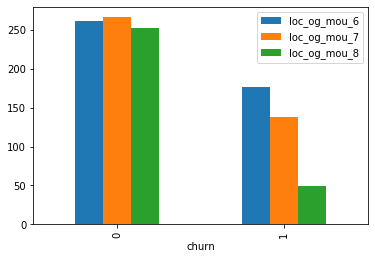

In [55]:
# Plot for loc_og_mou
data = telecom_churn_df.groupby(['churn'])['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'].mean()
print(data)
data.plot.bar()
plt.show()

**Observation**
- Local outgoing MOU for churners are very high compared to non-churns in the months 7 and 8

#### Total_roam_mou vs churn

In [56]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    telecom_churn_df['Total_roam_mou_'+str(i)] = (telecom_churn_df['roam_ic_mou_'+str(i)])+(telecom_churn_df['roam_og_mou_'+str(i)])


churn                     0          1
Total_roam_mou_6  39.383658  81.605404
Total_roam_mou_7  28.663870  80.752161
Total_roam_mou_8  29.037042  71.513333


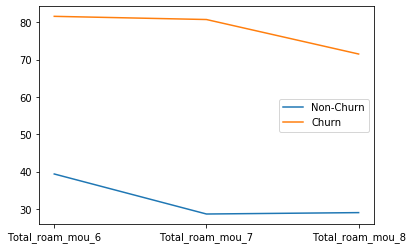

In [57]:
# Plot for Total roaming mou
col = ['Total_roam_mou_6','Total_roam_mou_7','Total_roam_mou_8']
data = telecom_churn_df.groupby(['churn'])[col].mean().T
print(data)
plt.plot(data)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

**Observation**
- There is a very huge difference in margin usage (roaming mou) for churners and non-churners.
- Customers who are making a large roaming calls tends to churn more

#### last_day_rch_amt vs churn

churn                        0           1
last_day_rch_amt_6  100.661849  104.191718
last_day_rch_amt_7  102.328795   78.980538
last_day_rch_amt_8   97.481378   35.987992


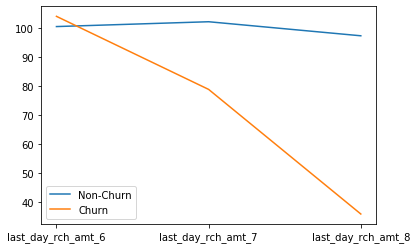

In [58]:
# Plot for last day recharge amount
col = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
data = telecom_churn_df.groupby(['churn'])[col].mean().T
print(data)
plt.plot(data)
plt.legend(['Non-Churn', 'Churn'])
plt.show()

**Observation**
- The average last recharge amount for the churners in the months 7 and 8 are very less compared to other customers

***

## Modelling

In [59]:
# creating copy
telecom_churn_PCA = telecom_churn_df.copy()
# removing the columns not required for modeling
telecom_churn_PCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [60]:
# removing the datatime columns before PCA
date_cols = list(telecom_churn_PCA.select_dtypes(include=['datetime64']).columns)
telecom_churn_PCA.drop(date_cols, axis=1, inplace=True)

In [61]:
# Split the data into test and train datasets
X = telecom_churn_PCA.drop("churn", axis = 1)
y = telecom_churn_PCA.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100, stratify = y)

In [62]:
# Rescaling the features before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling the class imbalance


It seems the dataset is higly imbalanced, and this will cause the model to predict the majority class data, and there is high chance that the minority data gets ignored.
So we need to handle this before creating a model to predict the class

In [64]:
print("Before:counts of label 1: {}".format(sum(y_train==1)))
print("Before:counts of label 0: {}".format(sum(y_train==0)))
print()
print("Before:churn rate : {}%".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before:counts of label 1: 1690
Before:counts of label 0: 19227

Before:churn rate : 8.08%


In [65]:
# Handle the imbalance using SMOTE technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [66]:
print("After:counts of label 1: {}".format(sum(y_train_res==1)))
print("After:counts of label 0: {}".format(sum(y_train_res==0)))
print()
print("After:churn rate : {}%".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After:counts of label 1: 19227
After:counts of label 0: 19227

After:churn rate : 50.0%


In [67]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)

In [68]:
# Perform the PCA
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

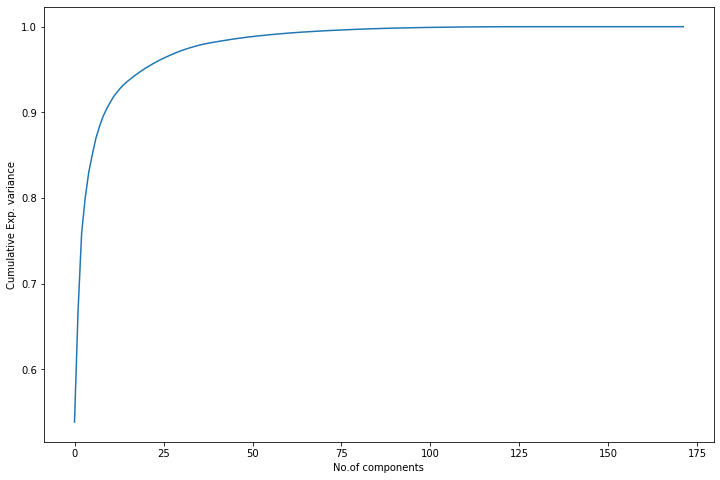

In [69]:
# Create the screeplot to get an idea on the overall explained variance information
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of components')
plt.ylabel('Cumulative Exp. variance')
plt.show()

In [70]:
# Get explainded variance of PCA components
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4) * 100).head(60)

0     53.83
1     66.84
2     75.89
3     79.99
4     83.01
5     85.06
6     86.97
7     88.31
8     89.51
9     90.38
10    91.15
11    91.84
12    92.38
13    92.87
14    93.30
15    93.66
16    93.99
17    94.31
18    94.61
19    94.90
20    95.17
21    95.42
22    95.66
23    95.89
24    96.11
25    96.31
26    96.51
27    96.70
28    96.87
29    97.04
30    97.20
31    97.35
32    97.48
33    97.61
34    97.72
35    97.84
36    97.94
37    98.02
38    98.10
39    98.18
40    98.25
41    98.32
42    98.39
43    98.45
44    98.52
45    98.58
46    98.64
47    98.69
48    98.75
49    98.80
50    98.85
51    98.90
52    98.94
53    98.99
54    99.03
55    99.07
56    99.11
57    99.14
58    99.18
59    99.22
dtype: float64

It seems like the **35 components** can be used to explain the overall variance of **97.84%** in the dataset

In [71]:
# Perform the IncrementalPCA for the 35 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(38454, 35)

In [72]:
# Analyse the correlation matrix for the given dataset
corr_mat = np.corrcoef(df_train_pca.transpose())
corrmat_nodiag = corr_mat - np.diagflat(corr_mat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.012480472834956973 , min corr:  -0.017490274638369618


It seems like the overall correlation between the given variables are almost 0, so we have removed the multicollinearity issue

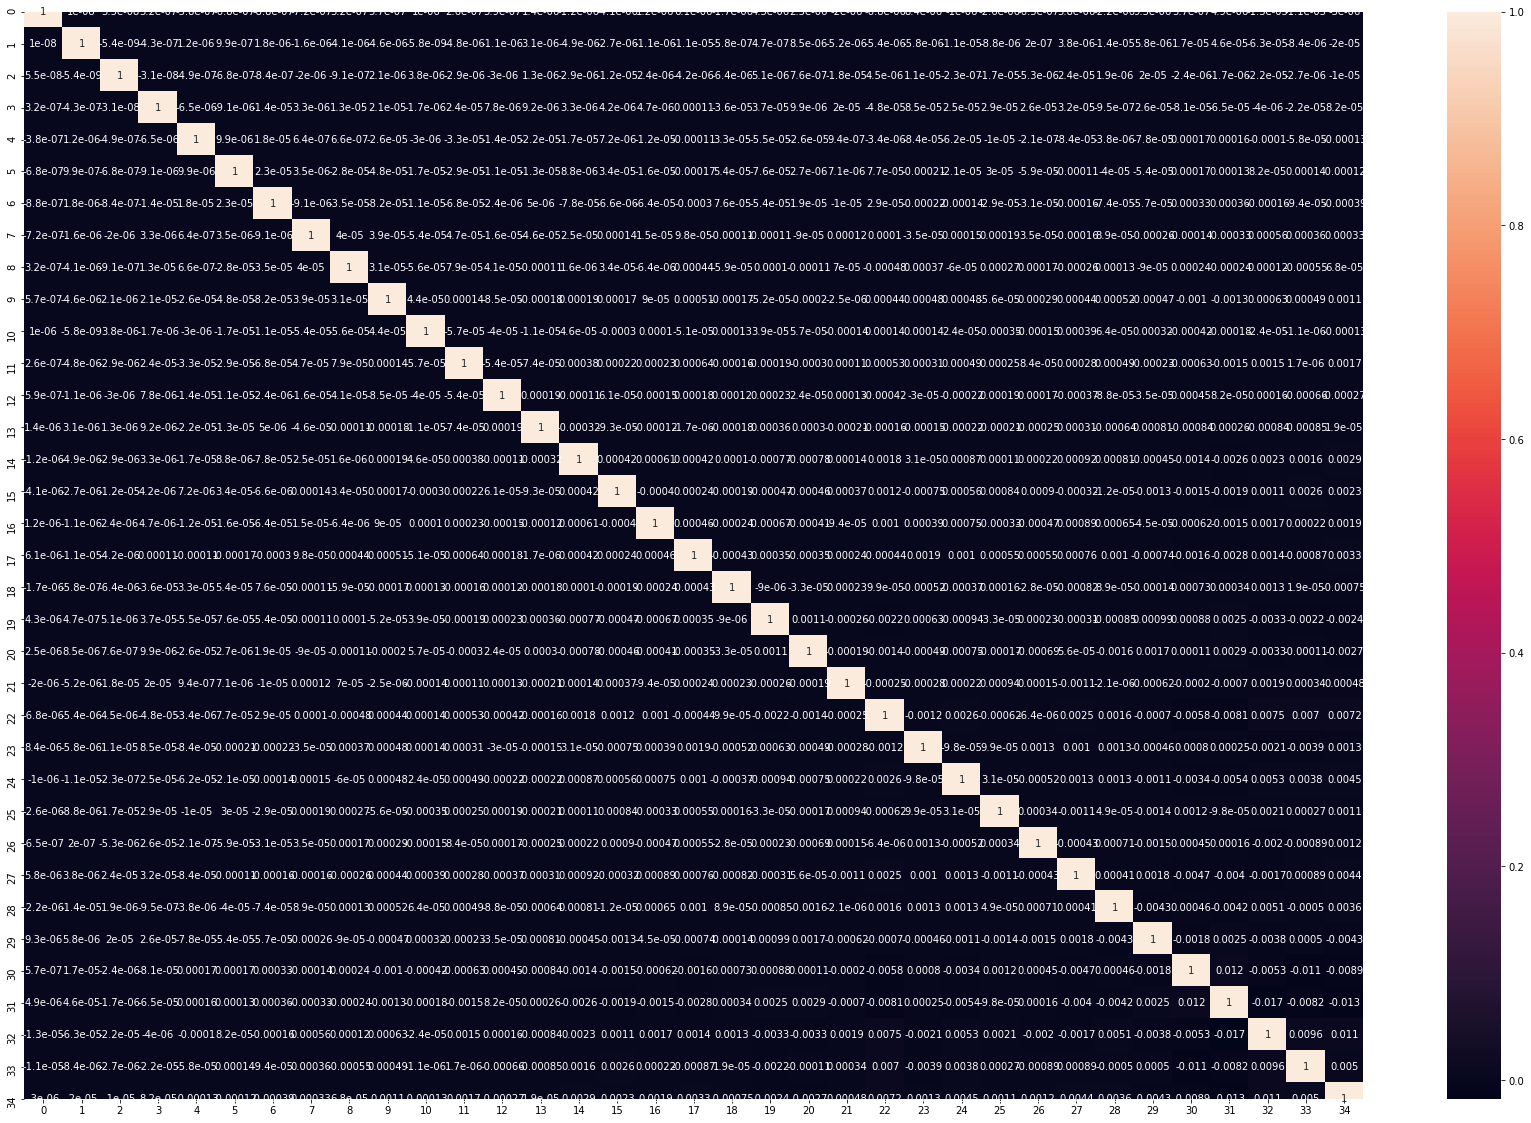

In [73]:
# Plot a heat map to under the correlation
plt.figure(figsize = (30, 20))
sns.heatmap(corr_mat,annot = True)
plt.show()

In [74]:
# Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8965, 35)

***

### Prediction Model

### Logistic Regression with PCA

In [75]:
# Create a LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lgr_pca = LogisticRegression(class_weight='balanced')
model_pca = lgr_pca.fit(df_train_pca, y_train_res)

In [76]:
# Calculate the ROC_AUC score
pred_probs_test = model_pca.predict_proba(df_train_pca)[:,1]
print("ROC_AUC_Score:{:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_test)))

ROC_AUC_Score:0.91


In [77]:
# Prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [78]:
# Get the confusion matrix and calculate the accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6705 1535]
 [ 134  591]]
0.8138315672058003


In [79]:
# Calculate the Sensitivity, Specificity and other related model metrixcs
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default)
TP = confusion_matrix[1, 1] # TP
TN = confusion_matrix[0, 0] # TN
FP = confusion_matrix[0, 1] # FP
FN = confusion_matrix[1, 0] # FN

print("ROC_AUC_Score : {}".format(metrics.roc_auc_score(y_test, y_pred_default)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred_default)))
print("Accuracy : {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Recall : {}".format(metrics.recall_score(y_test, y_pred_default)))

ROC_AUC_Score : 0.8144430030130565
Sensitivity/Recall : 0.8151724137931035
Specificity: 0.8137135922330098
False Positive Rate: 0.1862864077669903
Positive predictive value: 0.2779868297271872
Negative Predictive value: 0.9804064921772189
Precision: 0.2779868297271872
Accuracy : 0.8138315672058003
Recall : 0.8151724137931035


In [80]:
# Making the predictions on the test data now
y_pred_df = pd.DataFrame(pred_test)
y_pred = y_pred_df.iloc[:, [1]]

y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test, y_pred],axis=1)

y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [81]:
# Function to create the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

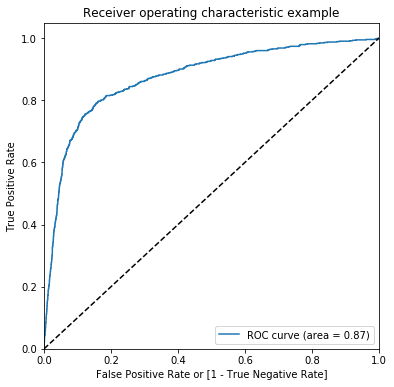

(array([0.        , 0.        , 0.        , ..., 0.99975728, 0.99987864,
        1.        ]),
 array([0.        , 0.00137931, 0.00275862, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99938643e+00, 9.99386431e-01, 9.98223656e-01, ...,
        2.69537161e-11, 2.16643623e-11, 6.86110061e-12]))

In [82]:
# Plot the ROC curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [83]:
# Get the predictions for various cut-off values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.321160,1,1,1,1,0,0,0,0,0,0
1,0,0.120532,1,1,0,0,0,0,0,0,0,0
2,0,0.001699,1,0,0,0,0,0,0,0,0,0
3,0,0.525377,1,1,1,1,1,1,0,0,0,0
4,0,0.087679,1,0,0,0,0,0,0,0,0,0


In [84]:
# Calculate the model metrics for different cut-off values
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.080870     0.000000     1.000000
0.1          0.1  0.445064     0.400485     0.951724
0.2          0.2  0.586280     0.557524     0.913103
0.3          0.3  0.677524     0.659830     0.878621
0.4          0.4  0.749805     0.741505     0.844138
0.5          0.5  0.813832     0.813714     0.815172
0.6          0.6  0.861015     0.870024     0.758621
0.7          0.7  0.891467     0.908738     0.695172
0.8          0.8  0.913887     0.940655     0.609655
0.9          0.9  0.921919     0.980340     0.257931


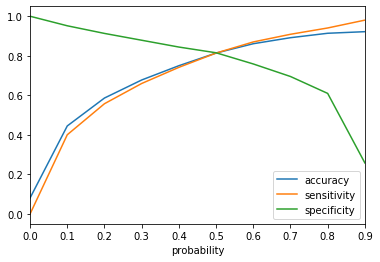

In [85]:
# Plot the model metrics for different probabiliy
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [86]:
# Get the optimal cut-off value
def get_optimal_cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame(
        {'tf' : pd.Series(tpr-(1-fpr), index=i),
         'threshold' : pd.Series(threshold, index=i)}
    )
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])


threshold = get_optimal_cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5009117447823636]


In [87]:
# Create predicted column based on cut-off value 0.50
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)
y_pred_final.churn.value_counts()

0    8240
1     725
Name: churn, dtype: int64

In [88]:
# Get the confusion matrix
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6705, 1535],
       [ 134,  591]], dtype=int64)

In [89]:
# Calculate the model metrics based on confusion matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))
print('Sensitivity: ', TP / float(TP + FN))
print('Specificity: ',TN / float(TN + FP))
print('false postive rate: ',FP/ float(TN + FP))
print('positive predictive value: ',TP / float(TP + FP))
print('Negative predictive value: ',TN / float(TN + FN))


Accuracy Score :  0.8138315672058003
Sensitivity:  0.8151724137931035
Specificity:  0.8137135922330098
false postive rate:  0.1862864077669903
positive predictive value:  0.2779868297271872
Negative predictive value:  0.9804064921772189


### Decision Tree with PCA

In [90]:
# Create the default decision tree classifier class
dt_pca = DecisionTreeClassifier(
    class_weight='balanced',
    max_features='auto',
    min_samples_split=100,
    min_samples_leaf=100,
    max_depth=6,
    random_state=10
)
model_pca = dt_pca.fit(df_train_pca, y_train_res)

In [91]:
# Predict it on test data
y_pred_default = model_pca.predict(df_test_pca)

In [92]:
# Calculate the confusion matrix
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test, y_pred_default))

[[6088 2152]
 [ 209  516]]
Acuracy Score 0.7366424986056888


In [93]:
# Calculate all the model metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default)
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("ROC_AUC_Score : {}".format(metrics.roc_auc_score(y_test, y_pred_default)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred_default)))
print("Accuracy : {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Recall : {}".format(metrics.recall_score(y_test, y_pred_default)))

ROC_AUC_Score : 0.7252795446936725
Sensitivity/Recall : 0.7117241379310345
Specificity: 0.7388349514563107
False Positive Rate: 0.2611650485436893
Positive predictive value: 0.1934032983508246
Negative Predictive value: 0.9668095918691441
Precision: 0.1934032983508246
Accuracy : 0.7366424986056888
Recall : 0.7117241379310345


### Perform tuning for hyper parameters

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(
    estimator = dtree,
    param_grid = param_grid,
    refit='recall_score',
    cv=n_folds,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(df_train_pca,y_train_res)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 16.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [95]:
print('Accuracy of',grid_search.best_score_,'with',grid_search.best_params_)

Accuracy of 0.8618870654044997 with {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [96]:
# Creating the model with tuned hyperparmater values
clf_gini = DecisionTreeClassifier(
    criterion = "gini",
    class_weight='balanced',
    random_state = 100,
    min_samples_leaf=5,
    max_depth=10,                               
    min_samples_split=5
)
# Fit the model
clf_gini.fit(df_train_pca,y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [97]:
# Predict it on test data
y_pred_default = clf_gini.predict(df_test_pca)
# Get the confusion matrix
confusion_tree_hyper=metrics.confusion_matrix(y_test,y_pred_default)

In [98]:
# Calculate the model metrics
TP = confusion_tree_hyper[1, 1]
TN = confusion_tree_hyper[0, 0]
FP = confusion_tree_hyper[0, 1]
FN = confusion_tree_hyper[1, 0]

print("ROC_AUC_Score : {}".format(metrics.roc_auc_score(y_test, y_pred_default)))
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
print('Specificity: {}'.format(TN / float(TN+FP)))
print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
print('Positive predictive value: {}'.format(TP / float(TP+FP)))
print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred_default)))
print("Accuracy : {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Recall : {}".format(metrics.recall_score(y_test, y_pred_default)))

ROC_AUC_Score : 0.755507197857382
Sensitivity/Recall : 0.6896551724137931
Specificity: 0.8213592233009709
False Positive Rate: 0.1786407766990291
Positive predictive value: 0.2535496957403651
Negative Predictive value: 0.9678249678249679
Precision: 0.2535496957403651
Accuracy : 0.8107083100948131
Recall : 0.6896551724137931


**Observations**

It seems like the Decision Tree has provided Poor sensitivity compared to the other model.
The best model option to predict is PCA along with Logistic regression.

- **Decision Tree Metrics**
  - ROC_AUC_Score : 0.76
  - Sensitivity/Recall : 0.69
  - Specificity: 0.82
<br>
<br>
- **Logistic Regression Metrics** 
  - Accuracy Score :  0.81
  - Sensitivity:  0.82
  - Specificity:  0.81
 
<br>
<br>
The Logistic Regression model with cut-off probabilty 0.5 gives the best specificity of 82% for the test data.
For the DecisionTree it gives a lower recall value compared to the other model.

### Model to predict the best churn driving features

### LogistcRegression model with RFE

In [99]:
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model
logreg = LogisticRegression(class_weight='balanced')

# Perform the RFE to get the top 15 features
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)       
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_) 

[False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False  True  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False  True False False  True False False  True Fa

In [100]:
# Perform the training and test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100, stratify = y)

In [101]:
# Apply scaling on the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_columns = X_train.columns
X_train[X_columns] = scaler.fit_transform(X_train[X_columns])
X_test[X_columns] = scaler.transform(X_test[X_columns])

In [102]:
# Get the columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'total_rech_data_7', 'total_rech_data_8',
       'count_rech_2g_8', 'night_pck_user_7', 'night_pck_user_8',
       'sachet_2g_8', 'fb_user_8', 'total_rech_num_data_6',
       'total_rech_num_data_7', 'total_rech_num_data_8'],
      dtype='object')

In [103]:
# Function to calculate the VIF values
import statsmodels.api as sm

def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y,x).fit().rsquared  
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [104]:
# Calculate the VIF
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=telecom_churn_df[col_for_vif], dependent_col='churn')

,Var,Vif
5,total_rech_data_7,inf
6,total_rech_data_8,inf
13,total_rech_num_data_7,inf
14,total_rech_num_data_8,inf
7,count_rech_2g_8,60.73
10,sachet_2g_8,57.57
9,night_pck_user_8,8.05
11,fb_user_8,5.65
3,total_rech_num_6,4.22
4,total_rech_num_8,3.80


In [105]:
# Remove the column total_rech_data_7 and calcualte VIF
col_for_vif.remove('total_rech_data_7')
vif_cal(input_data=telecom_churn_df[col_for_vif], dependent_col='churn')

,Var,Vif
5,total_rech_data_8,inf
13,total_rech_num_data_8,inf
6,count_rech_2g_8,60.73
9,sachet_2g_8,57.57
8,night_pck_user_8,8.05
10,fb_user_8,5.65
3,total_rech_num_6,4.22
12,total_rech_num_data_7,4.00
4,total_rech_num_8,3.80
7,night_pck_user_7,3.33


In [106]:
# Remove the column total_rech_data_8 and calcualte VIF
col_for_vif.remove('total_rech_data_8')
vif_cal(input_data=telecom_churn_df[col_for_vif], dependent_col='churn')

,Var,Vif
5,count_rech_2g_8,60.73
8,sachet_2g_8,57.57
12,total_rech_num_data_8,9.39
7,night_pck_user_8,8.05
9,fb_user_8,5.65
3,total_rech_num_6,4.22
11,total_rech_num_data_7,4.00
4,total_rech_num_8,3.80
6,night_pck_user_7,3.33
2,loc_ic_mou_8,3.10


In [107]:
# Remove the column count_rech_2g_8 and calcualte VIF
col_for_vif.remove('count_rech_2g_8')
vif_cal(input_data=telecom_churn_df[col_for_vif], dependent_col='churn')

,Var,Vif
11,total_rech_num_data_8,9.28
6,night_pck_user_8,7.55
7,sachet_2g_8,6.65
8,fb_user_8,4.71
3,total_rech_num_6,4.22
10,total_rech_num_data_7,3.99
4,total_rech_num_8,3.80
5,night_pck_user_7,3.33
2,loc_ic_mou_8,3.10
1,loc_ic_t2m_mou_7,2.99


In [108]:
# Remove the column total_rech_num_data_8 and calcualte VIF
col_for_vif.remove('total_rech_num_data_8')
vif_cal(input_data=telecom_churn_df[col_for_vif], dependent_col='churn')

,Var,Vif
6,night_pck_user_8,7.54
8,fb_user_8,4.38
3,total_rech_num_6,4.20
10,total_rech_num_data_7,3.79
4,total_rech_num_8,3.67
5,night_pck_user_7,3.31
2,loc_ic_mou_8,3.10
1,loc_ic_t2m_mou_7,2.99
9,total_rech_num_data_6,2.78
7,sachet_2g_8,2.56


In [109]:
# Remove the column night_pck_user_8 and calcualte VIF
col_for_vif.remove('night_pck_user_8')
vif_cal(input_data=telecom_churn_df[col_for_vif], dependent_col='churn')

,Var,Vif
3,total_rech_num_6,4.03
4,total_rech_num_8,3.66
9,total_rech_num_data_7,3.39
2,loc_ic_mou_8,3.05
1,loc_ic_t2m_mou_7,2.97
8,total_rech_num_data_6,2.76
6,sachet_2g_8,2.44
5,night_pck_user_7,2.42
7,fb_user_8,1.73
0,roam_og_mou_7,1.05


In [110]:
# Run the model using selected variables
col_for_vif.remove('churn')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col_for_vif], y_train)

LogisticRegression(class_weight='balanced')

In [111]:
# Predict on test data
pred_probs_test = logsk.predict_proba(X_test[col_for_vif])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [112]:
# Predict and calculate the accuracy score
pred_test = logsk.predict_proba(X_test[col_for_vif])
y_pred_default = logsk.predict(X_test[col_for_vif])
print(classification_report(y_test,y_pred_default))
print(metrics.confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8240
           1       0.24      0.81      0.37       725

    accuracy                           0.78      8965
   macro avg       0.61      0.79      0.62      8965
weighted avg       0.92      0.78      0.83      8965

[[6399 1841]
 [ 139  586]]
accuracy_score :  0.7791411042944786


In [113]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(pred_test)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [114]:
# Calculate the ROC_AUC score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8737202879142955


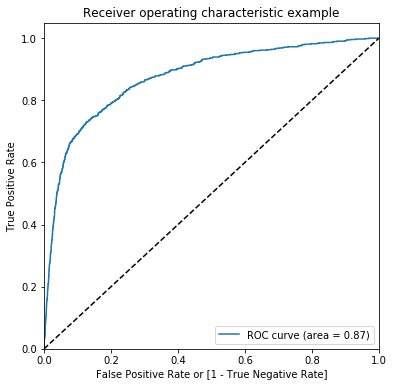

In [115]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(
    y_pred_final.churn,
    y_pred_final.churn_prob,
    drop_intermediate=False
)

auc_score = metrics.roc_auc_score(y_pred_final.churn,y_pred_final.churn_prob)
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [116]:
# Different cutoff and probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.312235,1,1,1,1,0,0,0,0,0,0
1,0,0.416431,1,1,1,1,1,0,0,0,0,0
2,0,0.269475,1,1,1,0,0,0,0,0,0,0
3,0,0.479492,1,1,1,1,1,0,0,0,0,0
4,0,0.276104,1,1,1,0,0,0,0,0,0,0


In [117]:
# Calculate the metrics for various cut-off values
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080870  0.000000  1.000000
0.1   0.1  0.332850  0.276699  0.971034
0.2   0.2  0.468377  0.425971  0.950345
0.3   0.3  0.584049  0.554976  0.914483
0.4   0.4  0.694255  0.678519  0.873103
0.5   0.5  0.779141  0.776578  0.808276
0.6   0.6  0.833910  0.841262  0.750345
0.7   0.7  0.886001  0.903398  0.688276
0.8   0.8  0.924707  0.964684  0.470345
0.9   0.9  0.923703  0.992597  0.140690


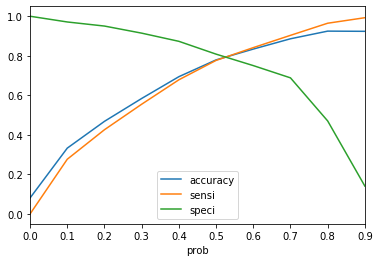

In [118]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [119]:
## Finidng the optimal cutoff
def get_optimal_cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame(
        {'tf' : pd.Series(tpr-(1-fpr), index=i),
         'threshold' : pd.Series(threshold, index=i)}
    )
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])


threshold = get_optimal_cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5305361307183357]


In [120]:
# Creating new column based on cut-off 0.53
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.53 else 0)

y_pred_final.churn.value_counts()

0    8240
1     725
Name: churn, dtype: int64

In [121]:
# Calculation the confusion matrix
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6545, 1695],
       [ 148,  577]], dtype=int64)

In [122]:
# Calculate the metrics
TP = confusion[1, 1] # TP
TN = confusion[0, 0] # TN
FP = confusion[0, 1] # FP
FN = confusion[1, 0] # FN

print("ROC_AUC_Score : {}".format(metrics.roc_auc_score(y_test, y_pred_default)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred_default)))
print("Accuracy : {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Recall : {}".format(metrics.recall_score(y_test, y_pred_default)))

ROC_AUC_Score : 0.7924267659859392
Sensitivity/Recall : 0.7958620689655173
Specificity: 0.7942961165048543
False Positive Rate: 0.20570388349514562
Positive predictive value: 0.2539612676056338
Negative Predictive value: 0.9778873449873001
Precision: 0.24145035022661723
Accuracy : 0.7791411042944786
Recall : 0.8082758620689655


In [123]:
# Get the intecepts
intercept_df = pd.DataFrame(logsk.intercept_.reshape((1,1)), columns = ['intercept'])

In [124]:
# Get all coefficients values
coefficients = logsk.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]
coefficients

logistic_features = list(col_for_vif)
logistic_features
coefficients_df = pd.DataFrame(logsk.coef_, columns=logistic_features)

In [125]:
# Get the coefficients and intecept values in a single dataframe
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients.T

,0
intercept,-1.375448
roam_og_mou_7,0.224325
loc_ic_t2m_mou_7,0.689711
loc_ic_mou_8,-2.767209
total_rech_num_6,0.349950
total_rech_num_8,-0.702749
night_pck_user_7,-0.033612
sachet_2g_8,-0.227459
fb_user_8,-0.684297
total_rech_num_data_6,0.000066


### Recomendation for Model Selection

Logistic Regression performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA.
LogisticRegression is the best model with 81.5% Sensitivity and 81.4% Accuracy score

###### LogisticRegression with RFE
Accuracy Score : 0.7791411042944786
Sensitivity: 0.7958620689655173

###### Logistic regression with PCA
Accuracy Score :  0.8138315672058003
Sensitivity:  0.8151724137931035

###### DecisionTree with PCA
Accuracy Score :  0.8107083100948131
Sensitivity: 0.6896551724137931

##### Below are the Driver variables of Churn:
- <i>total_rech_num_6</i> -- total number of recharges done in the month 6
- <i>total_rech_num_8</i> -- total number of recharges done in the month 8
- <i>total_rech_num_data_7</i> -- total recharge amount for data in month 7
- <i>total_rech_num_data_6</i> -- total recharge amount for data in month 6
- <i>loc_ic_mou_8</i> -- local incoming calls minutes of usage in month 8
- <i>loc_ic_t2m_mou_7</i> -- local incoming calls to another operator minutes of usage in month 8
- <i>sachet_2g_8</i> -- 2g service schemes with validity smaller than a month in month 8
- <i>night_pck_user_7</i> -- service scheme which uses during night hours in month 7
- <i>fb_user_8</i> -- services of Facebook and similar social networking sites for month 8
- <i>roam_og_mou_7</i> -- outgoing roaming calls minutes of usage in month 8

###### Recommendations:

- Lower the total recharge amount higher the churn rate.
- Churners show higher roaming usage than non-churners.
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like,
    - Discounted roaming rates during particular hours of the day.
    - Free monthly roaming mou's depending on the users past roaming mou usage.

#### The End